### This is my attempt at the Ultimate Data Science Challenge takehome project.

##### Part 1: aggregate the login count data in logins.json into 15-minute intervals, visualize the data and describe important features as well as data quality issues.

In [129]:
### import the data

import pandas as pd
import numpy as np

import json  

logins = pd.read_json("logins.json")

In [130]:
print(len(logins))
logins.head(5)

93142


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [131]:
logins.isnull().values.any()

### No null values

False

In [132]:
logins.info()

### 93142 entries, all of type datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


##### Now to aggregate the data into 15-minute intervals.

In [133]:
logins.set_index('login_time', inplace=True)
logins['counts'] = 1
logins = logins.resample('15T').sum()

In [134]:
print(logins.shape)
print(logins.info())
logins.head(-5)

### The data is now sorted into 15-minute blocks. Now only 9788 records. No nulls?

(9788, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
counts    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB
None


,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


In [135]:
logins.isnull().values.any()

### Still no null values

False

##### Now to visualize this data

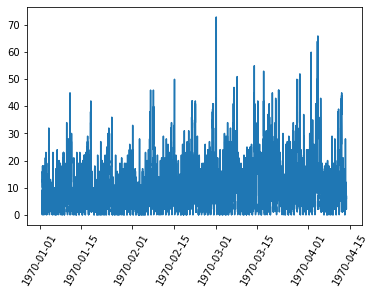

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(logins)
plt.xticks(rotation=60);

plt.savefig('graphs/allData.png')
plt.show()

##### This plot shows all the data. There seems to be some sort of trend with spikes 1 week apart but it is hard to tell. Let's look at a smaller subset.

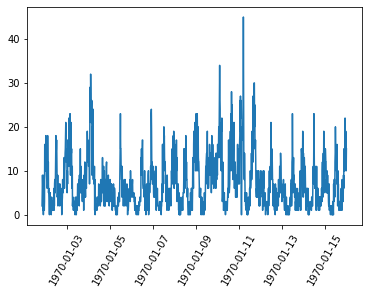

In [137]:
plt.plot(logins['1970-01-01':'1970-01-15'])
plt.xticks(rotation=60);

plt.savefig('graphs/earlyData.png')
plt.show()

##### The two biggest spikes are on Jan. 4th and Jan. 11th. These are 7 days apart, suggesting a weekly pattern related to the day of week. I'd like to aggregate this data into weekly and monthly counts to examine this pattern closer.

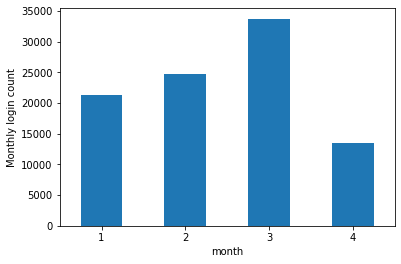

In [138]:
#logins = pd.read_json("logins.json")

#logins.set_index('login_time', inplace=True)
#logins['counts'] = 1
#logins = logins.resample('15T').sum()

logins['time'] = pd.to_datetime(logins.index)
logins['hour'] = logins.time.dt.hour
logins['month'] = logins.time.dt.month
logins['weekday'] = logins.time.dt.weekday
logins['week'] = logins.time.dt.week

logins.groupby('month')['counts'].aggregate(np.sum).plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("Monthly login count")

plt.savefig('graphs/MonthlyData.png')
plt.show()

##### It looks like there is an increase in counts from January to February to March. The April dataset ends on the 13th and so is not complete, and thus lower.

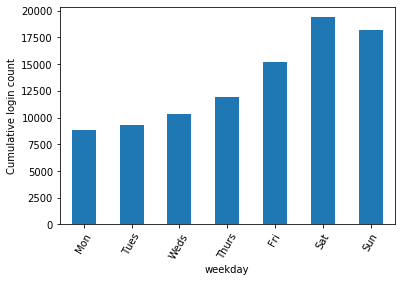

In [139]:
ax = logins.groupby('weekday')['counts'].sum().plot(kind='bar')

### This library defaults to Mondays as 0 and Sundays as 6.

ax.set_xticklabels("Mon Tues Weds Thurs Fri Sat Sun".split())

plt.xticks(rotation=60)
plt.ylabel("Cumulative login count")

plt.savefig('graphs/weekdayData.png')
plt.show()

##### The peak is on Saturday, with a slight dip on Sunday, a larger dip on Monday and then a gradual increase to Saturday. This pattern seems consistent with primarily weekend uage (Friday nights, all day Saturday and then during the day on Sunday.)

In [122]:
##### Let's look for hourly trends.

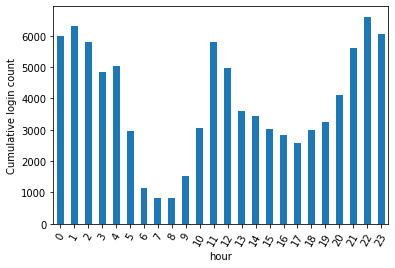

In [140]:
ax = logins.groupby('hour')['counts'].sum().plot(kind='bar')

### This library defaults to Mondays as 0 and Sundays as 6.

#ax.set_xticklabels("Mon Tues Weds Thurs Fri Sat Sun".split())

plt.xticks(rotation=60)
plt.ylabel("Cumulative login count")

plt.savefig('graphs/hourlyData.png')
plt.show()

##### Usage peaks at noon and midnight with troughs in the early morning and early evening.

In [ ]:
##### The monthly data is a bit rough because there are only 3 complete months. Let's look at weekly patterns - is usage increasing over time?

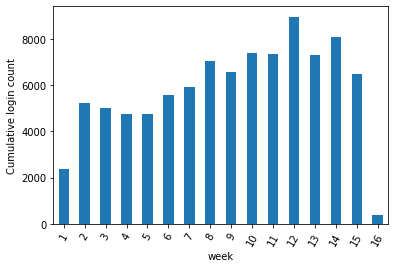

In [141]:
ax = logins.groupby('week')['counts'].sum().plot(kind='bar')

### This library defaults to Mondays as 0 and Sundays as 6.

#ax.set_xticklabels("Mon Tues Weds Thurs Fri Sat Sun".split())

plt.xticks(rotation=60)
plt.ylabel("Cumulative login count")

plt.savefig('graphs/weeklyData.png')
plt.show()

##### It does seem that the weekly logins increase from the first week until the 12th week (in March), then begin to decrease in April. The first and last weeks do not have a full 7 days' worth of data and should be ignored.

### Summary

##### Login counts are increasing over time in this dataset, increasing from January onward and seeming to peak in mid-March, although there is little data for February. Logins were lowest on Monday, gradually rising to a peak on Saturday and then dipping slightly on Sunday. On an hourly bases, logins follow a cyclical pattern of peaking around noon and midnight and being lowest in the morning and evening.